DT : [0.8375 0.82   0.81   0.82   0.795 ]
RF : [0.95   0.94   0.9375 0.9525 0.965 ]
SVM : [0.8775 0.8625 0.8575 0.855  0.89  ]


/home/damgi/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/damgi/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/damgi/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/damgi/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LR : [0.725  0.6975 0.7    0.685  0.64  ]


/home/damgi/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


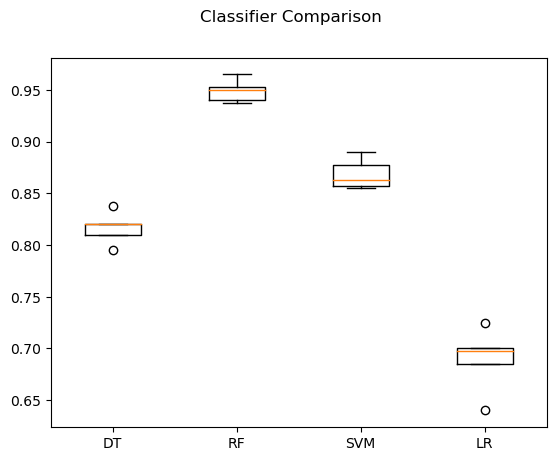

In [14]:
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection


DATASET_PATH = "dataset/mobile.csv"  # 본인이 mobile.csv를 저장한 경로를 입력합니다.

if __name__ == "__main__":
    mobile_dataset = pd.read_csv(DATASET_PATH)
    mobile_dataset['target'] = mobile_dataset['price_range']

    x_data = mobile_dataset.iloc[:, :20]
    y_data = mobile_dataset.iloc[:, [-1]]

    classifier_list = []
    classifier_list.append(("DT", DecisionTreeClassifier()))
    classifier_list.append(("RF", SVC()))
    classifier_list.append(("SVM", RandomForestClassifier()))
    classifier_list.append(("LR", LogisticRegression(max_iter=3000)))
    
    results = []
    names = []
    
    for name, classifier in classifier_list:
        kfold = model_selection.StratifiedKFold(n_splits=5, random_state=7, shuffle=True)
        cv_results = model_selection.cross_val_score(classifier, x_data, y_data.values.ravel(), cv=kfold, scoring="accuracy")

        print(name, ":", cv_results)
        results.append(cv_results)
        names.append(name)
            
    fig = plt.figure()

    fig.suptitle('Classifier Comparison')
    ax = fig.add_subplot(111)
    plt.boxplot(results)
    ax.set_xticklabels(names)
    plt.show()